In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# --- Step 1: Data Loading and Inspection ---
print("--- Step 1: Data Loading and Inspection ---")
try:
    df_train = pd.read_csv('/content/train.csv')
    df_test = pd.read_csv('/content/test.csv')

    # Combine the datasets for consistent preprocessing and analysis
    # The 'fake' column is the target variable
    df = pd.concat([df_train, df_test], ignore_index=True)

    print("Datasets loaded and combined successfully.")
    print("\nInitial Data Info:")
    df.info()
    print("\nFirst 5 Rows of the Combined Dataset:")
    print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

except FileNotFoundError:
    print("Error: train.csv or test.csv was not found.")
    print("Please ensure both CSV files are in the same directory as this script.")
    exit()

--- Step 1: Data Loading and Inspection ---
Datasets loaded and combined successfully.

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           696 non-null    int64  
 1   nums/length username  696 non-null    float64
 2   fullname words        696 non-null    int64  
 3   nums/length fullname  696 non-null    float64
 4   name==username        696 non-null    int64  
 5   description length    696 non-null    int64  
 6   external URL          696 non-null    int64  
 7   private               696 non-null    int64  
 8   #posts                696 non-null    int64  
 9   #followers            696 non-null    int64  
 10  #follows              696 non-null    int64  
 11  fake                  696 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 65.4 KB

First 5 Rows of the C

In [4]:
# --- Step 2: Data Preprocessing and Cleaning ---
print("\n--- Step 2: Data Preprocessing and Cleaning ---")
# The dataset appears to be clean with no missing values based on inspection
# The numerical columns are already in a clean format.

print("No major data cleaning required. Columns are ready for modeling.")


--- Step 2: Data Preprocessing and Cleaning ---
No major data cleaning required. Columns are ready for modeling.



--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---


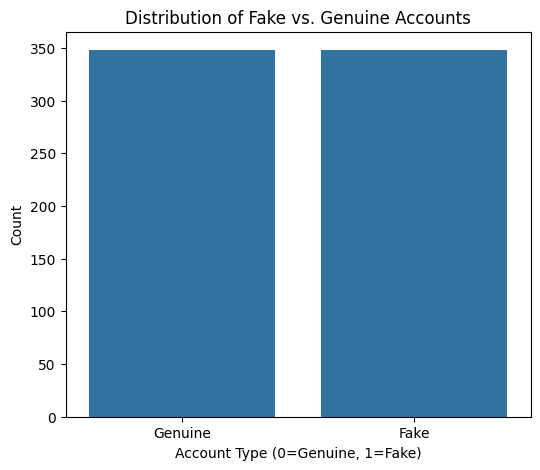

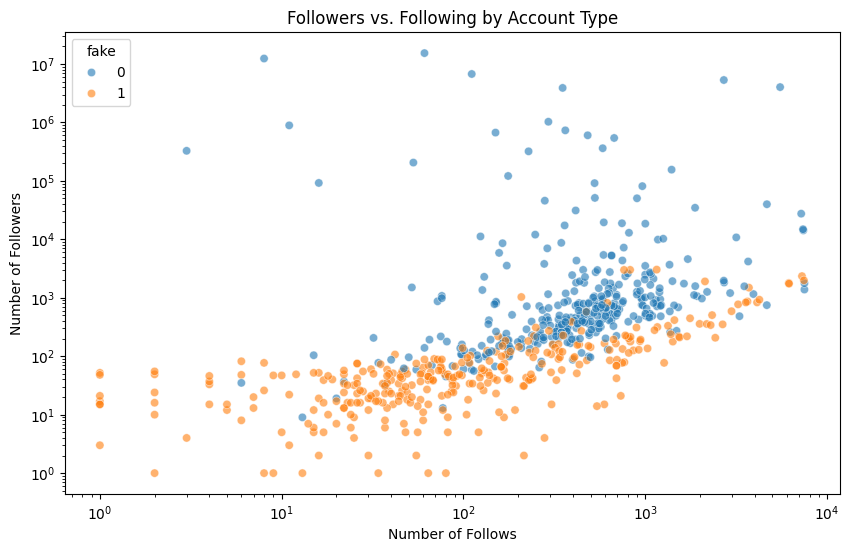

Key insights from EDA have been visualized.


In [5]:
# --- Step 3: Exploratory Data Analysis (EDA) & Visualization ---
print("\n--- Step 3: Exploratory Data Analysis (EDA) & Visualization ---")

# Analyze the distribution of the target variable 'fake'
plt.figure(figsize=(6, 5))
sns.countplot(x='fake', data=df)
plt.title('Distribution of Fake vs. Genuine Accounts')
plt.xlabel('Account Type (0=Genuine, 1=Fake)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Genuine', 'Fake'])
plt.show()

# Visualize the relationship between '#followers' and '#follows' for both groups
plt.figure(figsize=(10, 6))
sns.scatterplot(x='#follows', y='#followers', hue='fake', data=df, alpha=0.6)
plt.title('Followers vs. Following by Account Type')
plt.xlabel('Number of Follows')
plt.ylabel('Number of Followers')
plt.xscale('log')
plt.yscale('log')
plt.show()

print("Key insights from EDA have been visualized.")

In [6]:
# --- Step 4: Feature Engineering and Model Setup ---
print("\n--- Step 4: Feature Engineering and Model Setup ---")

# Define features (X) and target (y)
features = ['profile pic', 'nums/length username', 'fullname words',
            'nums/length fullname', 'name==username', 'description length',
            'external URL', 'private', '#posts', '#followers', '#follows']
target = 'fake'
X = df[features]
y = df[target]

# Split the combined data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Features defined and data is ready for modeling.")


--- Step 4: Feature Engineering and Model Setup ---
Features defined and data is ready for modeling.


In [7]:
# --- Step 5: Modeling: Build a Logistic Regression Model ---
print("\n--- Step 5: Modeling ---")

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

# Make predictions on the test set
y_pred = model.predict(X_test)



--- Step 5: Modeling ---
Logistic Regression model trained successfully.


In [8]:
# --- Step 6: Evaluation ---
print("\n--- Step 6: Evaluation ---")
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(class_report)


--- Step 6: Evaluation ---
Accuracy: 0.6429

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.86      0.71        70
           1       0.75      0.43      0.55        70

    accuracy                           0.64       140
   macro avg       0.68      0.64      0.63       140
weighted avg       0.68      0.64      0.63       140




--- Step 7: Visualization of Model Results ---


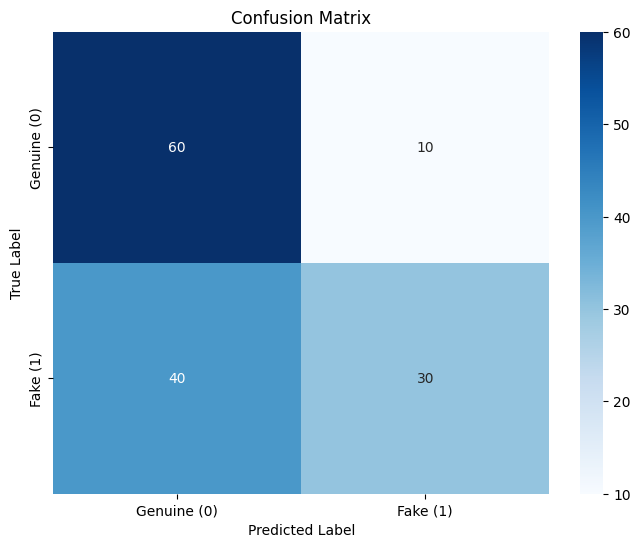


Full project workflow completed successfully.


In [9]:
# --- Step 7: Visualization: Visualize the Confusion Matrix ---
print("\n--- Step 7: Visualization of Model Results ---")

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Genuine (0)', 'Fake (1)'],
            yticklabels=['Genuine (0)', 'Fake (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nFull project workflow completed successfully.")